# What is an Artificial Neural Network:
An artificial neural network is a computational model that loosely resembles the way our brain works.

As far as we know, our brain is made up of neurons that get "triggered" depending on the information we capture with in our senses. For example, whenever we heard the voice of somebody we know our brain processes the sound information  and classify it to match the person that we are familiar with. 

In the Artificial Neural Network world we have artificial neurons that get triggered or activated given some numerical value. 

### The Perceptron
The Perceptron might be an example of the simplest artificial neuron that we can possible represent.
It takes in an input and gets activated if we have reached certain threshold( $\theta$).
The value that goes into the perceptron is composed of a sum of the product of weights and input parameters. 


$$
  PERCEPTRON : f(x) =  \left\{
\begin{array}{ll}
      1 & \sum\limits_{inputs}  w_i * x_i >  \theta \\
      0 & otherwise \\
\end{array} 
\right. 
$$

Which can be translated to: 
$$
  PERCEPTRON : f(x) =  \left\{
\begin{array}{ll}
      1 & \sum\limits_{inputs}  w_i * x_i - \theta >  0 \\
      0 & otherwise \\
\end{array} 
\right. 
$$

#### The Weights
These weights are the part of a neural network that is dynamic and learns from examples. Changes in this weights get adapted in order to optimize a desire output.
In addition, the threshold  $\theta$  gets adapted in order to get a desired outcome.

#### The Theta term or Bias
The theta term on the equation is called the bias term. Normally when neural networks get trained it is the first term that learns features on the input since it is always active and positive. We will discuss a little more about the Bias on more complex neural networks.


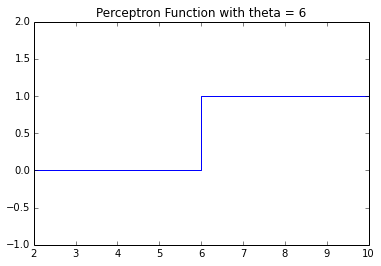

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


x = np.arange(1, 14, 1)
y = [0]*(int(len(x)/2))
y+= [1]*(int(len(x)/2)+1)
plt.step(x, y, label='pre (default)')
plt.ylim(-1, 2)
plt.xlim(2, 10)
plt.title("Perceptron Function with theta = 6")

plt.show()


### Learning Rule
In order for the perceptron to output the correct value it has to learn from previous examples. 
Learning happens when a perceptron makes a mistake. In this case the perceptron adapts its parameters in order to output the correct result given its inputs. 
The weights get updated and the threshold might change. 

The learning rule for the weights is defined as:

$$ w_1(t+1) = w_i(t) + \alpha * (teacher - output) *x_i $$

Where the teacher is the expected result and output is the current output of the neural network. 
If the neural network makes a mistake the difference of the teacher and output will inflict some change on a particular weight on the neural network , otherwise the network will stay the same.

The learning rate $\alpha$ defines the amount of change that is inflicted over a weight when it makes a mistake. 

### AND Gate Example
Lets consider an AND logical gate.

| X   | Y  | Output |
| ---- |:----:| ----:|
| 0   | 0 | 0 |
| 1   | 0 | 0 |
| 0   | 1 | 0 |
| 1   | 1 | 1 |

It is only one if both inputs are one, otherwise the output is zero. 

We can make a model of an AND function using a perceptron neuron. 
Recall the perceptron function, it takes into account the weighted sum of an input which in this case is the X and Y binary inputs. 
We can initialize the weights to zero. 

So the propagation of the inputs to the output of this neural network will be:

$$
  output =  \left\{
\begin{array}{ll}
      1 & \sum\limits_{inputs} = w_i * x_i >  \theta \\
      0 & otherwise \\
\end{array} 
\right. 
$$

Which is equal to:

$$
  output =  \left\{
\begin{array}{ll}
      1 & if: w_x * x +  w_y * y  - \theta >  0 \\
      0 & otherwise \\
\end{array} 
\right. 
$$

$\theta $ is the bias term since it is always on.


In [4]:

'''Lets run an AND logical example'''

'''Initialize the weights'''
w = [0,0]
theta = 0
alpha = 0.5
'''The expected value of the the and gate'''
x_labels = [0,0,0,1]

'''And gate inputs'''
x_values = [(0,0),(0,1),(1,0), (1,1)]

print "|X_2 \t| X_1 \t| T \t| W_1 \t| W_2\t|delta \t|"

'''Setting up the learning rate'''
error = True

'''Iterating 6 times over the data'''
for epoch in range(0,6):
    print "|Epoch:",epoch,"\t|\t|\t|\t|\t|"
    for index, value in enumerate (x_values):

        '''Calculate net output from the perceptron'''
        net  = w[0]*value[0] + w[1]*value[1]  
        
        '''Check if we reached the threshold'''
        if(net >= theta): 
            output = 1 
        else: 
            output = 0

        '''Calculating the delta'''
        delta = x_labels[index] - output

        w[0] = w[0] + alpha*(delta)*value[0]
        w[1] = w[1] + alpha*(delta)*value[1]

        if delta > 0:
            theta -= alpha
        elif delta < 0:
            theta += alpha

        print "|",value[0],"\t|",value[1],"\t|",x_labels[index], "\t|",w[0],"\t|", w[1],"\t|", delta,"\t|"

|X_2 	| X_1 	| T 	| W_1 	| W_2	|delta 	|
|Epoch: 0 	|	|	|	|	|
| 0 	| 0 	| 0 	| 0.0 	| 0.0 	| -1 	|
| 0 	| 1 	| 0 	| 0.0 	| 0.0 	| 0 	|
| 1 	| 0 	| 0 	| 0.0 	| 0.0 	| 0 	|
| 1 	| 1 	| 1 	| 0.5 	| 0.5 	| 1 	|
|Epoch: 1 	|	|	|	|	|
| 0 	| 0 	| 0 	| 0.5 	| 0.5 	| -1 	|
| 0 	| 1 	| 0 	| 0.5 	| 0.0 	| -1 	|
| 1 	| 0 	| 0 	| 0.5 	| 0.0 	| 0 	|
| 1 	| 1 	| 1 	| 1.0 	| 0.5 	| 1 	|
|Epoch: 2 	|	|	|	|	|
| 0 	| 0 	| 0 	| 1.0 	| 0.5 	| 0 	|
| 0 	| 1 	| 0 	| 1.0 	| 0.0 	| -1 	|
| 1 	| 0 	| 0 	| 0.5 	| 0.0 	| -1 	|
| 1 	| 1 	| 1 	| 1.0 	| 0.5 	| 1 	|
|Epoch: 3 	|	|	|	|	|
| 0 	| 0 	| 0 	| 1.0 	| 0.5 	| 0 	|
| 0 	| 1 	| 0 	| 1.0 	| 0.5 	| 0 	|
| 1 	| 0 	| 0 	| 0.5 	| 0.5 	| -1 	|
| 1 	| 1 	| 1 	| 1.0 	| 1.0 	| 1 	|
|Epoch: 4 	|	|	|	|	|
| 0 	| 0 	| 0 	| 1.0 	| 1.0 	| 0 	|
| 0 	| 1 	| 0 	| 1.0 	| 0.5 	| -1 	|
| 1 	| 0 	| 0 	| 1.0 	| 0.5 	| 0 	|
| 1 	| 1 	| 1 	| 1.0 	| 0.5 	| 0 	|
|Epoch: 5 	|	|	|	|	|
| 0 	| 0 	| 0 	| 1.0 	| 0.5 	| 0 	|
| 0 	| 1 	| 0 	| 1.0 	| 0.5 	| 0 	|
| 1 	| 0 	| 0 	| 1.0 	| 0.5 	| 0 	

### Conclusion
As we saw in the example everytime the Neural Network did a mistake it updated its weights and bias term. Sometimes these changes balanced out over time, however at the end the was able to learn how to output the correct result form an AND gate given two values. 

On the next session we will learn about classification and more complex neural networks.